<a href="https://colab.research.google.com/github/Akanksha-cell-max/Advanced-Artificial-Intelligence/blob/main/Practical_No_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Prediction: Not Class 0 with probability 1.00


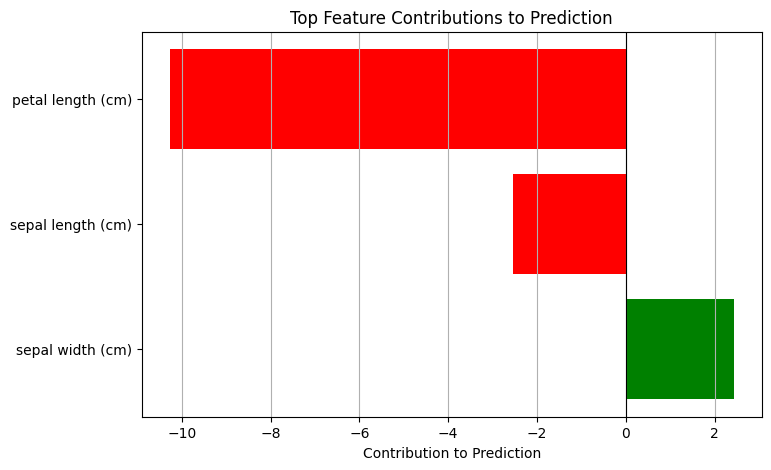


Explanation for the prediction:
 - Lower petal length (cm) (4.70) increased the chance.
 - Lower sepal length (cm) (6.10) increased the chance.
 - Higher sepal width (cm) (2.80) increased the chance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = (data.target == 0).astype(int)  # Classify class 0 vs others

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Select a test sample
sample = X_test.iloc[0]
sample_array = sample.values.reshape(1, -1)
prediction = model.predict(sample_array)[0]
proba = model.predict_proba(sample_array)[0]

print(f"Prediction: {'Class 0' if prediction == 1 else 'Not Class 0'} with probability {proba[prediction]:.2f}")

# Explanation function
def generate_explanation(sample, model, feature_names, top_k=3, visualize=False):
    # Coefficients
    coefs = model.coef_[0]

    # Contributions
    contributions = sample.values * coefs

    # Sort contributions
    sorted_idx = np.argsort(-np.abs(contributions))

    explanation = []
    top_features = []
    top_contributions = []

    for idx in sorted_idx[:top_k]:
        feature = feature_names[idx]
        value = sample.values[idx]
        weight = coefs[idx]
        contrib = contributions[idx]

        if weight > 0:
            phrase = f"Higher {feature} ({value:.2f}) increased the chance."
        else:
            phrase = f"Lower {feature} ({value:.2f}) increased the chance."

        explanation.append(phrase)
        top_features.append(feature)
        top_contributions.append(contrib)

    # Visualize if needed
    if visualize:
        plt.figure(figsize=(8, 5))
        bars = plt.barh(top_features, top_contributions, color=['green' if c > 0 else 'red' for c in top_contributions])
        plt.xlabel("Contribution to Prediction")
        plt.title("Top Feature Contributions to Prediction")
        plt.axvline(0, color='black', linewidth=0.8)
        plt.gca().invert_yaxis()  # Highest contributor on top
        plt.grid(axis='x')
        plt.show()

    return explanation

# Generate explanation and visualize
explanation = generate_explanation(sample, model, X.columns, visualize=True)

print("\nExplanation for the prediction:")
for line in explanation:
    print(f" - {line}")
